# Telco Churn 
#### Lori Segovia
#### Tuesday March 9, 2021

# Why did the customer get lost?!


## Project Goals:
The aim of this project is to use machine learning to predict which customers have a high likelihood of leaving us.  By understanding the drivers of churn and the relationships features have with each other, we can try to target those customers that might leave.

## Hypotheses to answer:
The last presentation focused on identifying some drivers of churn, today we will do the same, but also try to answer some follow up questions from last time:
- Does having fiber internet have any effect on customer churn?
- Does tech support have any effect on customer churn?

## Executive Summary
- A significant relationship between the internet service fiber optic and churn was detected
- A significant relationshiop between tech support and churn was detected
- Decision Tree Model represented the data most accurate with an accuracy of 79%

# **Plan**


- acquire the data with sql
- clean/prep the data
- explore features of data
- model data
- evaluate data

# **Acquire**

### These are the imports needed for this notebook:

In [141]:
# python files that contain the functions to aquire and prep the data
import acquire
import prepare
import explore
import eval

# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#imports for model object and metric functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#visulization settings
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.style as style 
style.available
style.use('seaborn-talk') #sets the size of the charts
style.use('seaborn-colorblind') #sets color of charts

In [142]:
df = acquire.get_telco_data()


In [3]:
df.shape

(7043, 24)

In [4]:
#Get a quick peek at the data that has been imported.  
df.head().T

,0,1,2,3,4
contract_type_id,1,1,1,1,1
internet_service_type_id,1,1,1,1,1
payment_type_id,2,4,1,1,3
customer_id,0003-MKNFE,0013-MHZWF,0015-UOCOJ,0023-HGHWL,0032-PGELS
gender,Male,Female,Female,Male,Female
senior_citizen,0,0,1,1,0
partner,No,No,No,No,Yes
dependents,No,Yes,No,No,Yes
tenure,9,9,7,1,1
phone_service,Yes,Yes,Yes,No,No


In [5]:
#Get descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


#### *Keep in mind that some of these statistics are from categorical variables so the data is not valuable to us yet.  The values that we need to look at are the quantitative ones like tenure and monthly charges.  Also, notice that total charges is missing...

### Our target variable for this dataset is "churn".  So let's look at how many churners and non churners we have in this dataset.

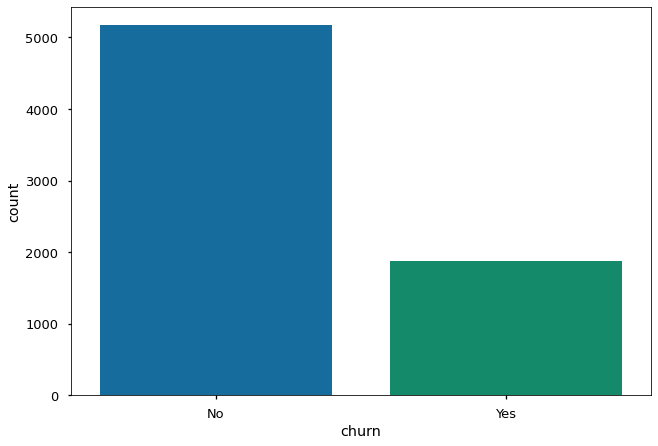

In [6]:
sns.countplot(df.churn)
plt.show()
#No     5174
#Yes    1869

### Let's also look at some distributions of individual variables:
- narrowed down to features I was interested in exploring further in exploration phase
- if everything checks out we can proceed to next step

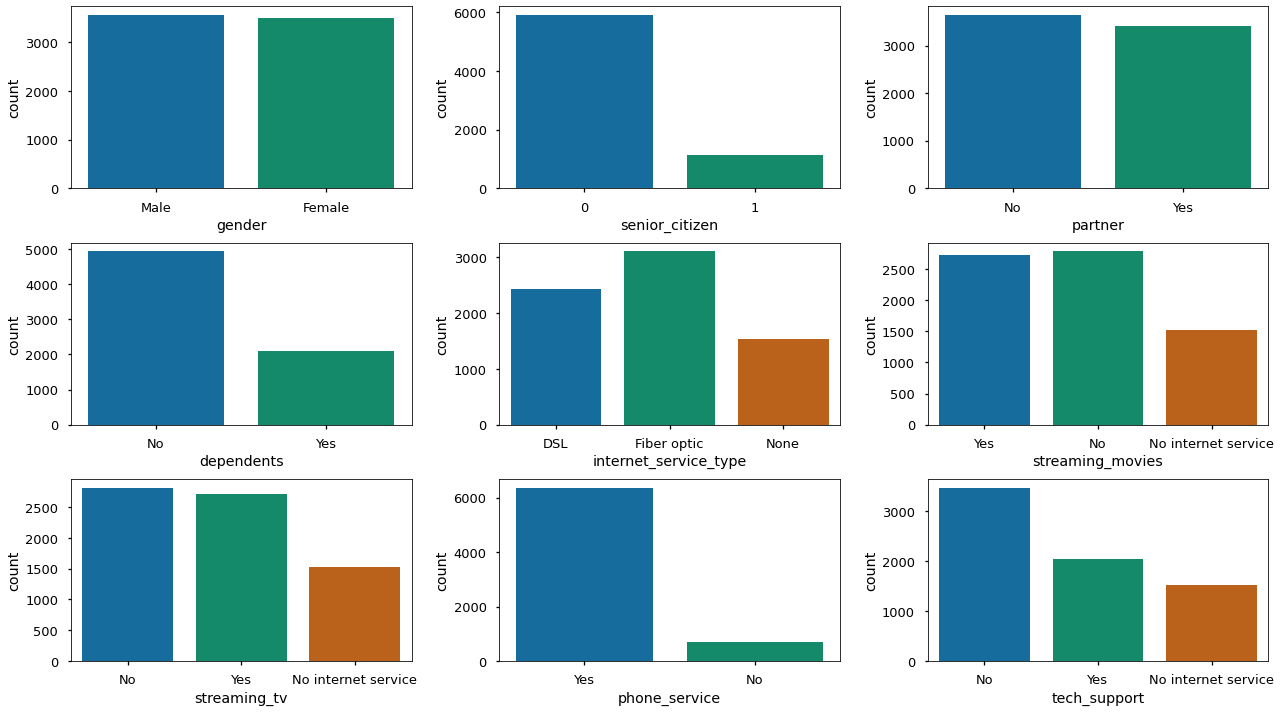

In [7]:
# Nine subplots for features we are interested in exploring

plt.figure(figsize=(18, 10))

plt.subplot(331)
sns.countplot(df.gender)

plt.subplot(332)
sns.countplot(df.senior_citizen)

plt.subplot(333)
sns.countplot(df.partner)

plt.subplot(334)
sns.countplot(df.dependents)

plt.subplot(335)
sns.countplot(df.internet_service_type)

plt.subplot(336)
sns.countplot(df.streaming_movies)

plt.subplot(337)
sns.countplot(df.streaming_tv)

plt.subplot(338)
sns.countplot(df.phone_service)

plt.subplot(339)
sns.countplot(df.tech_support)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"><b>Acquire Key Takeaways: </b>
<br>- Telco dataset has 7043 rows of customers and 24 columns.
<br>- The dataset has x categorical features and y quantitative features, many of which need to be re-categorized.  
<br>- There are x customers that have churned and y customers that have stayed</div>

# **Prepare**

In [8]:
df = prepare.prep_telco()

In [9]:
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,online_security,online_backup,device_protection,tech_support,streaming_tv,...,paperless_billing,monthly_charges,total_charges,churn,phone_lines,fiber,no_internet,contract,is_female,tenure_years
customer_id,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,0,0,0,9,1,0,0,0,0,0,...,0,59.9,542.4,0,2,0,0,0,0,0.75
0013-MHZWF,0,0,1,9,1,0,0,0,1,1,...,1,69.4,571.45,0,1,0,0,0,1,0.75
0015-UOCOJ,1,0,0,7,1,1,0,0,0,0,...,1,48.2,340.35,0,1,0,0,0,1,0.58
0023-HGHWL,1,0,0,1,0,0,0,0,0,0,...,1,25.1,25.1,1,0,0,0,0,0,0.08
0032-PGELS,0,1,1,1,0,1,0,0,0,0,...,0,30.5,30.5,1,0,0,0,0,1,0.08


<div class="alert alert-block alert-success"><b>Prepare Key Takeaways:</b>
<br>- Dropped redundant features:  contract_type_id, internet_service_type_id, payment_type_id
<br>- Changed Yes/No features to 1/0: partner, dependents, phone_service, paperless_billing, and churn 
<br>- Changed features with No/None/Yes to 0/0/1:   online_security, online_backup, tech_support, streaming_tv, streaming_movies, device_protection  
<br>- Made dummies: internet_service_type
<br>- Renamed dummies to fiber and none
<br>- Changed contract_type to 0=MTM, 1=1 year, 2=2 year
<br>- Changed gender to is_female with 0=Male, 1=Female   
<br>- Dropped the old feature columns: multiple_lines, internet_service_type, contract_type, gender, payment_type
<br>- Changed total charges from object to numeric
<br>- Filled in missing charges from total charges with 0
<br>- Added tenure_years as new feature
<br>- Reset the index to the customer_id</div>

# **Explore**

In [10]:
def telco_split(df):
    # performs train, validate, test split on telco data, stratified by churn
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

In [11]:
train, validate, test = telco_split(df)

In [12]:
train.shape

(3943, 21)

In [13]:
validate.shape

(1691, 21)

In [14]:
test.shape

(1409, 21)

In [30]:
# Now to separate X and y values
X_train = train.drop(columns=["churn"])
y_train = train.churn

X_validate = validate.drop(columns=["churn"])
y_validate = validate.churn

X_test = test.drop(columns=["churn"])
y_test = test.churn

### Questions
1. What months do customers churn the most in? What months into service can we target to keep our customers from churning?
2. Are customers more likely to churn depending on theri internet type? What internet services have the highest amount of churners? Are our services operating as described (internet speed)?  Can customers get better internet serice for less somewhere else?
3. Do people who have tech support have a lower rate of churn? How is our customer service rating?  Is there a specific service that requires more tech support?  Can we optimize tech support to the services that need it most?

In [133]:
# categorical and quantitative variables
cat_vars = ['senior_citizen', 'partner', 'dependents', 
            'phone_service','contract', 'tech_support',  
            'streaming_tv', 'streaming_movies', 'fiber', 'is_female', 'churn']

quant_vars = ['tenure', 'monthly_charges', 'tenure_years']

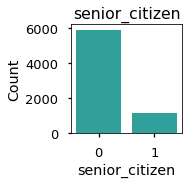

   senior_citizen  Count  Percent
0               0   5901    83.79
1               1   1142    16.21
_________________________________________________________________


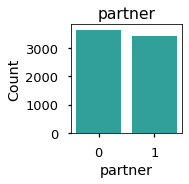

   partner  Count  Percent
0        0   3641     51.7
1        1   3402     48.3
_________________________________________________________________


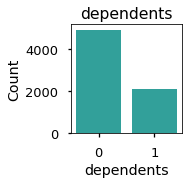

   dependents  Count  Percent
0           0   4933    70.04
1           1   2110    29.96
_________________________________________________________________


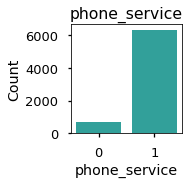

   phone_service  Count  Percent
1              1   6361    90.32
0              0    682     9.68
_________________________________________________________________


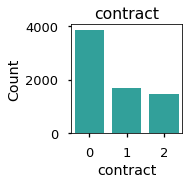

   contract  Count  Percent
0         0   3875    55.02
2         1   1695    24.07
1         2   1473    20.91
_________________________________________________________________


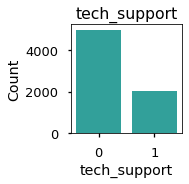

   tech_support  Count  Percent
0             0   4999    70.98
1             1   2044    29.02
_________________________________________________________________


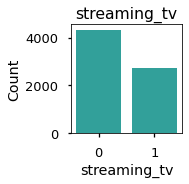

   streaming_tv  Count  Percent
0             0   4336    61.56
1             1   2707    38.44
_________________________________________________________________


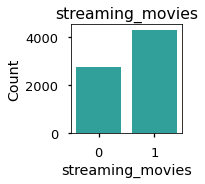

   streaming_movies  Count  Percent
0                 1   4311    61.21
1                 0   2732    38.79
_________________________________________________________________


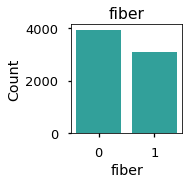

   fiber  Count  Percent
0      0   3947    56.04
1      1   3096    43.96
_________________________________________________________________


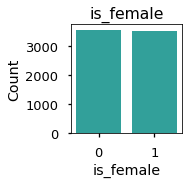

   is_female  Count  Percent
0          0   3555    50.48
1          1   3488    49.52
_________________________________________________________________


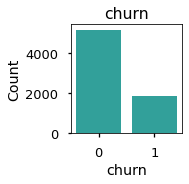

   churn  Count  Percent
0      0   5174    73.46
1      1   1869    26.54
_________________________________________________________________


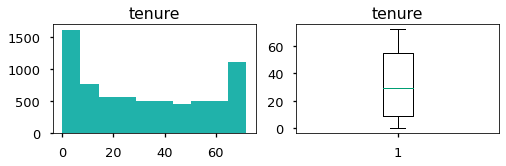

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


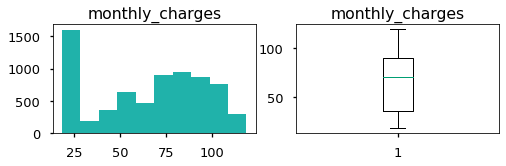

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


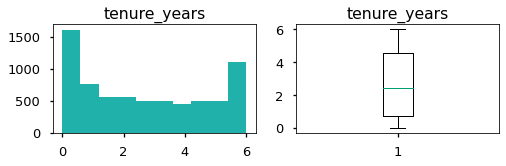

count    7043.000000
mean        2.697402
std         2.046968
min         0.000000
25%         0.750000
50%         2.420000
75%         4.580000
max         6.000000
Name: tenure_years, dtype: float64


In [134]:
explore.explore_univariate(df, cat_vars, quant_vars)

<div class="alert alert-block alert-success"><b>Univariate Statistics Key Takeaways:</b>
<br>- 44% of customers have fiber optic internet
<br>- 34% of customers have dsl internet
<br>- 29% of customers have had tech_support
<br>- 27% of customers have churned this quarter</div>

senior_citizen 
_____________________

         chi2       p-value  degrees of freedom
0  106.292446  6.361851e-25                   1

observed:
 churn              0     1   All
senior_citizen                  
0               2532   770  3302
1                365   276   641
All             2897  1046  3943

expected:
              0           1
0  2426.044636  875.955364
1   470.955364  170.044636


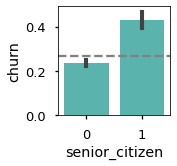


_____________________

partner 
_____________________

        chi2       p-value  degrees of freedom
0  59.095958  1.501674e-14                   1

observed:
 churn       0     1   All
partner                  
0        1383   645  2028
1        1514   401  1915
All      2897  1046  3943

expected:
              0           1
0  1490.011666  537.988334
1  1406.988334  508.011666


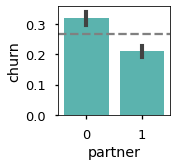


_____________________

dependents 
_____________________

         chi2       p-value  degrees of freedom
0  104.078831  1.944245e-24                   1

observed:
 churn          0     1   All
dependents                  
0           1887   859  2746
1           1010   187  1197
All         2897  1046  3943

expected:
              0           1
0  2017.540451  728.459549
1   879.459549  317.540451


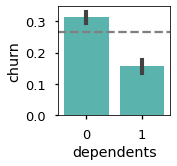


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  0.031921  0.858201                   1

observed:
 churn             0     1   All
phone_service                  
0               276    97   373
1              2621   949  3570
All            2897  1046  3943

expected:
              0           1
0   274.050469   98.949531
1  2622.949531  947.050469


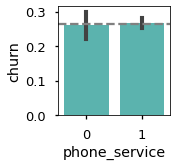


_____________________

contract 
_____________________

         chi2        p-value  degrees of freedom
0  625.295741  1.654837e-136                   2

observed:
 churn        0     1   All
contract                  
0         1269   919  2188
1          730   103   833
2          898    24   922
All       2897  1046  3943

expected:
              0           1
0  1607.566827  580.433173
1   612.021557  220.978443
2   677.411616  244.588384


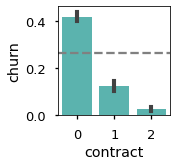


_____________________

tech_support 
_____________________

         chi2       p-value  degrees of freedom
0  111.221776  5.290815e-26                   1

observed:
 churn            0     1   All
tech_support                  
0             1941   881  2822
1              956   165  1121
All           2897  1046  3943

expected:
              0           1
0  2073.379153  748.620847
1   823.620847  297.379153


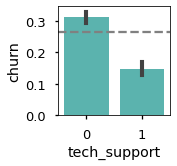


_____________________

streaming_tv 
_____________________

        chi2   p-value  degrees of freedom
0  17.559103  0.000028                   1

observed:
 churn            0     1   All
streaming_tv                  
0             1854   592  2446
1             1043   454  1497
All           2897  1046  3943

expected:
              0           1
0  1797.124524  648.875476
1  1099.875476  397.124524


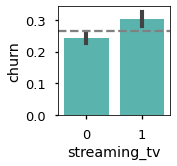


_____________________

streaming_movies 
_____________________

       chi2   p-value  degrees of freedom
0  12.56845  0.000392                   1

observed:
 churn                0     1   All
streaming_movies                  
0                 1822   592  2414
1                 1075   454  1529
All               2897  1046  3943

expected:
              0           1
0  1773.613492  640.386508
1  1123.386508  405.613492


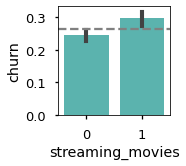


_____________________

fiber 
_____________________

         chi2       p-value  degrees of freedom
0  362.467375  8.171942e-81                   1

observed:
 churn     0     1   All
fiber                  
0      1879   321  2200
1      1018   725  1743
All    2897  1046  3943

expected:
              0           1
0  1616.383464  583.616536
1  1280.616536  462.383464


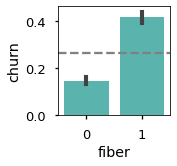


_____________________

is_female 
_____________________

       chi2   p-value  degrees of freedom
0  0.927191  0.335594                   1

observed:
 churn         0     1   All
is_female                  
0          1424   533  1957
1          1473   513  1986
All        2897  1046  3943

expected:
              0           1
0  1437.846564  519.153436
1  1459.153436  526.846564


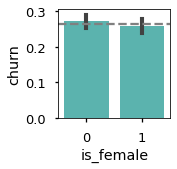


_____________________

churn 
_____________________

          chi2  p-value  degrees of freedom
0  3937.871007      0.0                   1

observed:
 churn     0     1   All
churn                  
0      2897     0  2897
1         0  1046  1046
All    2897  1046  3943

expected:
              0           1
0  2128.483135  768.516865
1   768.516865  277.483135


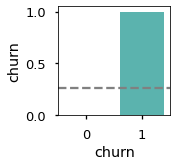


_____________________

tenure 
____________________



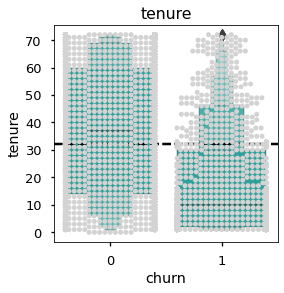

        count       mean        std  min   25%   50%   75%   max
churn                                                           
0      2897.0  37.021056  24.067195  0.0  14.0  37.0  60.0  72.0
1      1046.0  18.228489  19.391963  1.0   2.0  10.0  30.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2215778.5, pvalue=2.6225178502743525e-109)

____________________

monthly_charges 
____________________



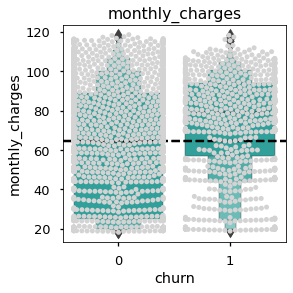

        count       mean        std    min      25%    50%      75%     max
churn                                                                      
0      2897.0  61.176976  31.293724  18.25  25.0500  64.35  88.9500  118.65
1      1046.0  74.376052  24.624883  18.85  56.8125  79.50  94.0375  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1149040.0, pvalue=4.103131725466243e-31)

____________________

tenure_years 
____________________



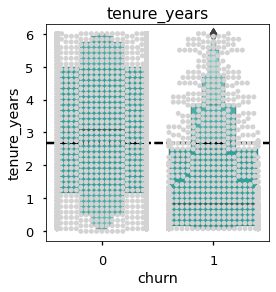

        count      mean       std   min   25%   50%  75%  max
churn                                                        
0      2897.0  3.085022  2.005771  0.00  1.17  3.08  5.0  6.0
1      1046.0  1.518432  1.616508  0.08  0.17  0.83  2.5  6.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2215778.5, pvalue=2.6225178502743525e-109)

____________________



In [143]:
explore.explore_bivariate(train, 'churn', cat_vars, quant_vars)

Text(0, 0.5, 'Monthly Charges')

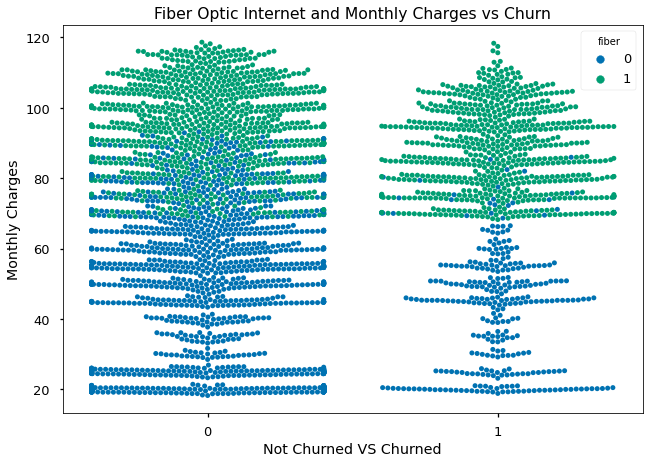

In [144]:
#Focus on the plots we are already interested in:
plt.title('Fiber Optic Internet and Monthly Charges vs Churn')
sns.swarmplot(x= 'churn', y= 'monthly_charges', data = train, hue= 'fiber')
plt.xlabel('Not Churned VS Churned')
plt.ylabel('Monthly Charges')

Text(0, 0.5, 'tech_support')

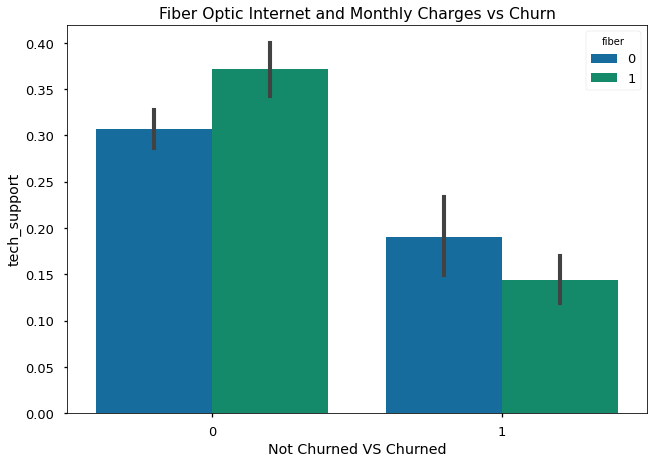

In [146]:
#Focus on the plots we are already interested in:
plt.title('Fiber Optic Internet and Tech Support vs Churn')
sns.barplot(x= 'churn', y= 'tech_support', data = train, hue= 'fiber')
plt.xlabel('Not Churned VS Churned')
plt.ylabel('tech_support')

In [20]:
#features we are exploring
X_train.corr()

,senior_citizen,partner,dependents,tenure,phone_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,churn,phone_lines,fiber,no_internet,contract,is_female,tenure_years
senior_citizen,1.000000,0.017445,-0.211666,0.016671,-0.003200,-0.028823,0.072176,0.037732,-0.049123,0.097215,0.134632,0.159859,0.220500,0.164965,0.089084,0.261095,-0.188338,-0.147086,-0.021800,0.016700
partner,0.017445,1.000000,0.444366,0.360852,0.012406,0.138088,0.139104,0.147650,0.121001,0.119148,0.105612,-0.013207,0.094952,-0.122998,0.104288,0.011725,-0.000164,0.275681,0.015688,0.360863
dependents,-0.211666,0.444366,1.000000,0.153251,0.000441,0.071248,0.033586,0.008807,0.071767,-0.015290,-0.047735,-0.121093,-0.110928,-0.163093,-0.005204,-0.158968,0.142754,0.238688,0.010037,0.153251
tenure,0.016671,0.360852,0.153251,1.000000,-0.001410,0.325468,0.356042,0.360221,0.317838,0.284566,0.287765,0.007571,0.256249,-0.340436,0.249331,0.041315,-0.050610,0.659006,0.006889,0.999999
phone_service,-0.003200,0.012406,0.000441,-0.001410,1.000000,-0.088639,-0.043403,-0.061009,-0.082523,-0.011405,-0.039768,0.015999,0.247370,0.003827,0.670973,0.287712,0.171100,-0.001843,-0.008889,-0.001344
online_security,-0.028823,0.138088,0.071248,0.325468,-0.088639,1.000000,0.280343,0.277584,0.352969,0.189083,0.189208,-0.006170,0.310338,-0.153262,0.042289,-0.005694,-0.337159,0.242924,0.018824,0.325497
online_backup,0.072176,0.139104,0.033586,0.356042,-0.043403,0.280343,1.000000,0.290100,0.270554,0.272109,0.269093,0.125131,0.435075,-0.073574,0.136527,0.167882,-0.376576,0.152006,0.010339,0.356068
device_protection,0.037732,0.147650,0.008807,0.360221,-0.061009,0.277584,0.290100,1.000000,0.318955,0.394048,0.403725,0.102861,0.491649,-0.067517,0.127781,0.205818,-0.377433,0.224646,0.003877,0.360258
tech_support,-0.049123,0.121001,0.071767,0.317838,-0.082523,0.352969,0.270554,0.318955,1.000000,0.266926,0.279597,0.022336,0.335921,-0.168587,0.041248,-0.014193,-0.333622,0.293276,0.004923,0.317879
streaming_tv,0.097215,0.119148,-0.015290,0.284566,-0.011405,0.189083,0.272109,0.394048,0.266926,1.000000,0.526083,0.231099,0.634029,0.067324,0.198483,0.346463,-0.414107,0.102020,0.016718,0.284579


In [154]:
#Top 10 Correlations for Churn
train.corr().iloc[13].sort_values(ascending=False)[0:10]

churn                1.000000
fiber                0.303773
monthly_charges      0.192753
paperless_billing    0.190913
senior_citizen       0.164965
streaming_tv         0.067324
streaming_movies     0.057048
phone_lines          0.027512
phone_service        0.003827
is_female           -0.015909
Name: churn, dtype: float64

<div class="alert alert-block alert-success"><b>Bivariate Statistics Key Takeaways:</b>
<br>- Binary target varible = churn
<br>- Fiber optic internet service is the most expensive option for churners and non churners 
<br>- 70% of internet service churn is from fiber optic customers    
<br>- Customers who had fiber optic internet requested tech_support more than those who did not have fiber optic internet for both those who have and have not churned
<br>- tech_support has slight negative correlation with churn
<br>- fiber has slight positive correlation with churn</div>

## Hypothesis 1:  Does having fiber internet have any effect on customer churn?

- Ho:  Having fiber internet is independent of churn
- Ha:  Having fiber internet is not independent of churn

In [23]:
# set alpha and confidence interval before running any tests
alpha = .05
confidence_level = .95

In [24]:
#Crosstab:  find the overall proportions, we multiply all the combinations
#of proportions together.  Now we have the expected proportions, we need
#to calculate the actual proportions so that we can compare them.

observed = pd.crosstab(train.fiber, train.churn)
observed

churn,0,1
fiber,,
0,1879,321
1,1018,725


In [25]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---------------------------------\nExpected\n')
print(expected)
print('---------------------------------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.22f}')

Observed

[[1879  321]
 [1018  725]]
---------------------------------
Expected

[[1616.38346437  583.61653563]
 [1280.61653563  462.38346437]]
---------------------------------

chi^2 = 362.4674
p     = 0.0000000000000000000000


### The pvalue is less than the alpha, so we reject our null hypothesis

## Hypothesis 2:  Does tech support have any effect on customer churn?
- Ho:  Having tech support does not effect churn
- Ha:  Having tech support does effect churn

In [26]:
# set alpha and confidence interval before running any tests
alpha = .05
confidence_level = .95

In [27]:
#Crosstab:  find the overall proportions, we multiply all the combinations
#of proportions together.  Now we have the expected proportions, we need
#to calculate the actual proportions so that we can compare them.

observed = pd.crosstab(train.tech_support, train.churn)
observed

churn,0,1
tech_support,,
0,1941,881
1,956,165


In [28]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---------------------------------\nExpected\n')
print(expected)
print('---------------------------------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.25f}')

Observed

[[1941  881]
 [ 956  165]]
---------------------------------
Expected

[[2073.37915293  748.62084707]
 [ 823.62084707  297.37915293]]
---------------------------------

chi^2 = 111.2218
p     = 0.0000000000000000000000001


### The pvalue is less than the alpha, so we reject our null hypothesis

# **Model**

## Baseline
- Our prediction for baseline is determined by taking the highest value count from churn

In [32]:
#Value counts of churn
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [33]:
#Train baseline prediction will be those that have not churned
train['baseline_prediction'] = 0

In [34]:
#Baseline accuracy
baseline_accuracy = round((train.churn == 0).mean(),3) *100
baseline_accuracy

73.5

<div class="alert alert-block alert-success"><b>Model Key Takeaways:</b>
<br>- Baseline Accuracy: 73.5% (the score we want to beat with our model)</div>

## Model KNN

In [83]:
#Features I want to train on
features1 = ['fiber', 'tech_support']
#make model
#weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
#fit model
knn.fit(X_train[features1], y_train)

KNeighborsClassifier(n_neighbors=3)

In [86]:
#mkae predictions
y_pred_knn = knn.predict(X_train[features1])
#estimate probability
y_pred_proba = knn.predict_proba(X_train[features1])

## Evaluate KNN

In [91]:
#accuracy
accuracy = knn.score(X_train[features1], y_train)
print(f"KNN Accuracy is {accuracy:.5}")

KNN Accuracy is 0.73472


In [88]:
#confustion matrix
print(confusion_matrix(y_train, y_pred_knn))

[[2897    0]
 [1046    0]]


In [89]:
#classification report
#confustion matrix
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2897
           1       0.00      0.00      0.00      1046

    accuracy                           0.73      3943
   macro avg       0.37      0.50      0.42      3943
weighted avg       0.54      0.73      0.62      3943



## Validate KNN

In [98]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate[features1], y_validate)))

Accuracy of KNN classifier on test set: 0.73


<div class="alert alert-block alert-success"><b>KNN Key Takeaways:</b>
<br>- Accuracy score of 73% does not beat baseline 
<br>- Try new model or change hyperparameters</div>

## Model Logistic Regression

In [101]:
# Create the logistic regression model from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=123) #Went with default hyperparameters

# we will use same features 
features2 = ['fiber', 'tech_support']

# Fit the model
logit.fit(X_train[features], y_train)



LogisticRegression(random_state=123)

In [102]:
# feature importance
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 1.45198162 -1.02102104]]
Intercept: 
 [-1.53642069]


In [103]:
#Make predictions
y_pred_lg = logit.predict(X_train[features2])

#estimate probability
y_pred_lg_proba = logit.predict_proba(X_train[features2])

## Evaluate Logistic Regression

In [104]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features2], y_train)))

Accuracy of Logistic Regression classifier on training set: 0.73


In [105]:
print("Baseline is", baseline_accuracy,)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features2], y_train)))

Baseline is 73.5
Accuracy of Logistic Regression classifier on training set: 0.73


In [106]:
#confusion matrix
print(confusion_matrix(y_train, y_pred_lg))

[[2897    0]
 [1046    0]]


In [107]:
#classification report
print(classification_report(y_train, y_pred_lg))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2897
           1       0.00      0.00      0.00      1046

    accuracy                           0.73      3943
   macro avg       0.37      0.50      0.42      3943
weighted avg       0.54      0.73      0.62      3943



## Validate Logistic Regression

In [109]:
y_pred_lg = logit.predict(X_validate[features2])

In [111]:
print('Accuracy: {:.2f}'.format(logit.score(X_validate[features2], y_validate)))

Accuracy: 0.73


<div class="alert alert-block alert-success"><b>Logistic Regression Key Takeaways:</b>
<br>- Accuracy score of 73% also fails to beat baseline 
<br>- Try new model or change hyperparameters</div>

## Model Decision Tree

In [112]:
#Create the Decision Tree object with desired hyper-parameters
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [113]:
#Fit the model
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=3, random_state=123)

In [47]:
#Graphviz: Visualize a Decision Tree
dot_data = export_graphviz(clf, feature_names= X_train.columns,rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_churn_decision_tree', view=True, format="pdf")



'fiber_and tech_support_decision_tree.pdf'

In [115]:
#make predictions on observations
y_pred_dt = clf.predict(X_train)
y_pred_dt[0:5] 

array([0, 0, 0, 0, 0])

In [117]:
#estimate probability of churn
y_pred_proba_dt = clf.predict_proba(X_train)
y_pred_proba_dt

array([[0.98855508, 0.01144492],
       [0.79514825, 0.20485175],
       [0.94155844, 0.05844156],
       ...,
       [0.31391586, 0.68608414],
       [0.94155844, 0.05844156],
       [0.98855508, 0.01144492]])

## Evaluate Decision Tree

In [118]:
#compute the accuracy 

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [120]:
# confusion matrix
confusion_matrix(y_train, y_pred_dt)

array([[2703,  194],
       [ 622,  424]])

In [121]:
y_train.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [122]:
#classification report
print(classification_report(y_train, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2897
           1       0.69      0.41      0.51      1046

    accuracy                           0.79      3943
   macro avg       0.75      0.67      0.69      3943
weighted avg       0.78      0.79      0.77      3943



In [123]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.78


In [124]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1242
           1       0.65      0.41      0.50       449

    accuracy                           0.78      1691
   macro avg       0.73      0.66      0.68      1691
weighted avg       0.77      0.78      0.77      1691



In [127]:
def get_metrics_binary(clf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a binary classifier and prints out metrics based on
    values in variables named X_train, y_train, and y_pred.
    
    return: a classification report as a transposed DataFrame
    '''
    accuracy = clf.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred_dt, output_dict=True)).T
    conf = confusion_matrix(y_train, y_pred_dt)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

In [128]:
report_df = get_metrics_binary(clf)


    The accuracy for our model is 0.7931
    The True Positive Rate is 0.405, The False Positive Rate is 0.067,
    The True Negative Rate is 0.933, and the False Negative Rate is 0.595
    


In [129]:
report_df

,precision,recall,f1-score,support
0,0.812932,0.933034,0.868852,2897.000000
1,0.686084,0.405354,0.509615,1046.000000
accuracy,0.793051,0.793051,0.793051,0.793051
macro avg,0.749508,0.669194,0.689234,3943.000000
weighted avg,0.779282,0.793051,0.773554,3943.000000


<div class="alert alert-block alert-success"><b>Decision Tree Key Takeaways:</b>
<br>- Decision Tree model with a depth of 3 has an accuracy of 79%, beating the model
</div>

In [132]:
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)
print('Accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy: 0.80


# Conclusion

<div class="alert alert-block alert-success"><b>Key Takeaways:</b>
<br>- A significant relationship with churn was observed in both fiber optic internet service and tech support
<br>- Decision Tree Model with depth of 3 performed the best
<br>- There are many features that have + or - correlation with churn that need to be explored
</div>

# Next Steps

<div class="alert alert-block alert-success"><b>Investigate:</b>
<br>- Many more relationships to be explored    
<br>- add more features to different models to see how they perform
</div>

# csv file

In [53]:
print(df.columns.to_list())

['senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'monthly_charges', 'total_charges', 'churn', 'phone_lines', 'fiber', 'no_internet', 'contract', 'is_female', 'tenure_years']


In [56]:
X = df[['senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'monthly_charges', 'total_charges', 'phone_lines', 'fiber', 'no_internet', 'contract', 'is_female', 'tenure_years']]

In [57]:
df['prediction'] = clf.predict(X)

In [58]:
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,online_security,online_backup,device_protection,tech_support,streaming_tv,...,monthly_charges,total_charges,churn,phone_lines,fiber,no_internet,contract,is_female,tenure_years,prediction
customer_id,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,0,0,0,9,1,0,0,0,0,0,...,59.9,542.4,0,2,0,0,0,0,0.75,0
0013-MHZWF,0,0,1,9,1,0,0,0,1,1,...,69.4,571.45,0,1,0,0,0,1,0.75,0
0015-UOCOJ,1,0,0,7,1,1,0,0,0,0,...,48.2,340.35,0,1,0,0,0,1,0.58,0
0023-HGHWL,1,0,0,1,0,0,0,0,0,0,...,25.1,25.1,1,0,0,0,0,0,0.08,0
0032-PGELS,0,1,1,1,0,1,0,0,0,0,...,30.5,30.5,1,0,0,0,0,1,0.08,0


In [60]:
pred = df.drop(columns=['senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'monthly_charges', 'total_charges', 'churn', 'phone_lines', 'fiber', 'no_internet', 'contract', 'is_female', 'tenure_years'])

In [66]:
pred.tail()

,prediction
customer_id,
9950-MTGYX,0
9953-ZMKSM,0
9964-WBQDJ,0
9972-EWRJS,0
9975-GPKZU,0


In [67]:

pred.reset_index()

,customer_id,prediction
0,0003-MKNFE,0
1,0013-MHZWF,0
2,0015-UOCOJ,0
3,0023-HGHWL,0
4,0032-PGELS,0
...,...,...
7038,9950-MTGYX,0
7039,9953-ZMKSM,0
7040,9964-WBQDJ,0
7041,9972-EWRJS,0


In [69]:

df_prob = pd.DataFrame(clf.predict_proba(X))
df_prob = df_prob.drop(0,axis=1)
df_prob = df_prob.rename(columns={1:'probability_churn'})
df_prob.head()

,probability_churn
0,0.172945
1,0.172945
2,0.172945
3,0.407229
4,0.407229


In [70]:
pred.head()

,prediction
customer_id,
0003-MKNFE,0
0013-MHZWF,0
0015-UOCOJ,0
0023-HGHWL,0
0032-PGELS,0


In [72]:
pred_2 = pd.concat([pred,df_prob], axis=1)
pred_2.head()

,prediction,probability_churn
0,NaN,0.172945
1,NaN,0.172945
2,NaN,0.172945
3,NaN,0.407229
4,NaN,0.407229


In [74]:

predictionsdf = pd.concat([pred.reset_index(drop=True), df_prob.reset_index(drop=True)], axis=1)
predictionsdf.head()

,prediction,probability_churn
0,0,0.172945
1,0,0.172945
2,0,0.172945
3,0,0.407229
4,0,0.407229


In [77]:
predictionsdf.prediction.value_counts()

0    5914
1    1129
Name: prediction, dtype: int64

In [75]:
predictionsdf.to_csv('predictions.csv')